# 2. Basic Raytracing

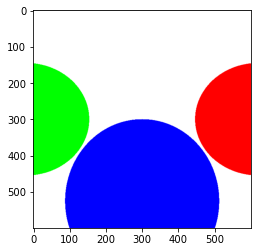

In [67]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt

canvas_width = 600
canvas_height = 600

class Sphere:
    def __init__(self, center, radius, color):
        self.center = center
        self.radius = radius
        self.color = color

viewport_size = 1
projection_plane_z = 1
camera_position = [0,0,0]
background_color = [255,255,255]

sphere1 = Sphere([0, -1, 3], 1, [0, 0, 255]) # OpenCv의 경우 RGB 가 아닌 BRG 순서이므로 순서를 조정했다.
sphere2 = Sphere([2, 0, 4], 1, [255, 0, 0])
sphere3 = Sphere([-2, 0, 4], 1, [0, 255, 0])
spheres = [sphere1, sphere2, sphere3]

def canvas2viewport(point2d):
    return [point2d[0] * viewport_size / canvas_width, point2d[1] * viewport_size / canvas_height, projection_plane_z]

def intersect_ray_sphere(origin, direction, sphere):
    oc = np.subtract(origin, sphere.center)
    
    k1 = np.dot(direction, direction)
    k2 = 2*np.dot(oc, direction)
    k3 = np.dot(oc, oc) - sphere.radius*sphere.radius
    
    discriminant = k2*k2 - 4*k1*k3
    if (discriminant < 0):
        return [math.inf, math.inf]
    
    t1 = (-k2 + math.sqrt(discriminant)) / (2*k1)
    t2 = (-k2 - math.sqrt(discriminant)) / (2*k1)
    return [t1, t2]

def traceray(origin, direction, min_t, max_t):
    closest_t = math.inf
    closest_sphere = None
    
    for i in range(3):
        ts = intersect_ray_sphere(origin, direction, spheres[i])
        if (ts[0] < closest_t and min_t < ts[0] and ts[0] < max_t):
            closest_t = ts[0]
            closest_sphere = spheres[i]
        if (ts[1] < closest_t and min_t < ts[1] and ts[1] < max_t):
            closest_t = ts[1]
            closest_sphere = spheres[i]
            
    if (closest_sphere == None):
        return background_color
    
    return closest_sphere.color

def putpixel(x, y, color):
    x = canvas_width/2 + x
    y = canvas_height/2 - y
    if (x< 0 or x >= canvas_width or y < 0 or y >= canvas_height):
        return
    cv2.line(img, (int(x), int(y)), (int(x), int(y)), (color[0], color[1], color[2]))

x = -canvas_width/2
y = -canvas_height/2

img = np.zeros((canvas_width,canvas_height,3), dtype = np.uint8)

for i in range(canvas_width):
    for j in range(canvas_height):
        direction = canvas2viewport([x,y])
        color = traceray(camera_position, direction, 1, math.inf)
        putpixel(x,y,color)
        y+=1
    y = -canvas_height/2
    x+=1
 

plt.imshow(img)
#cv2.imshow('Raytracer', img)
#cv2.waitKey()
#cv2.destoryAllWindows()